## EDA (Exploratory Data Analysis): HDI project

Summary of the data wrangling

The first step of this project has created a cleaned dataset including relevant 
information confirming we have the right data for assessing the most important 
factors impacting Human development index with data for 189 countries. We have 
idenfified our target variable: pov_index for which we will assess the correlation with others factors

Imports

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### Load the data

In [47]:
# Loading the data created from the wrangling step
raw_df = pd.read_csv('hdi_wrangling.csv')

### Exploring the data

In [48]:
raw_df.head()

,Unnamed: 0,Country,hdi_2009,hdi_2019,hdi_var,edu_2009,edu_2019,edu_var,pov_index
0,0,Afghanistan,0.460,0.511,0.051,8.9,10.2,1.3,0.27200
1,1,Albania,0.733,0.795,0.062,12.3,14.7,2.4,0.00300
2,2,Algeria,0.711,0.748,0.037,13.6,14.6,1.0,0.00800
3,3,Andorra,0.839,0.868,0.029,11.7,13.3,1.6,0.14129
4,4,Angola,0.515,0.581,0.066,9.0,11.8,2.8,0.28200


In [49]:
df = raw_df[['Country', 'hdi_2019','hdi_var', 'edu_2019', 'edu_var', 'pov_index']]

In [50]:
df.describe()

,hdi_2019,hdi_var,edu_2019,edu_var,pov_index
count,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.722423,0.040715,13.326984,0.824599,0.141290
std,0.149791,0.026742,2.940014,1.000975,0.115049
min,0.394000,-0.107000,5.000000,-2.999999,0.001000
25%,0.602000,0.029000,11.400000,0.300000,0.066000
50%,0.740000,0.040715,13.200000,0.800000,0.141290
75%,0.829000,0.056000,15.200000,1.300000,0.141290
max,0.957000,0.113000,22.000000,3.800000,0.590000


### Overview of the dependant variable

Text(0.5, 0, 'Poverty index')

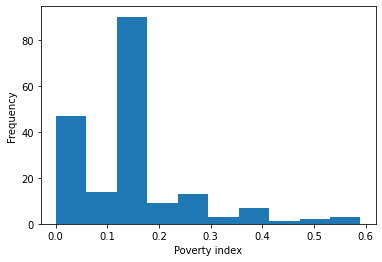

In [51]:
# Making a histogram of the hdi_var variable.
df['pov_index'].plot(kind = 'hist' )
plt.xlabel('Poverty index')

<AxesSubplot:xlabel='pov_index'>

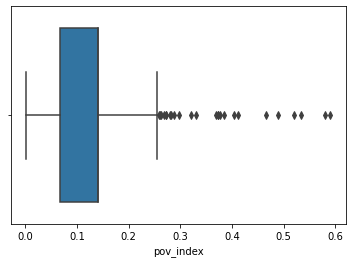

In [52]:
sns.boxplot( x = df['pov_index'])

Text(0.5, 0, 'HDI')

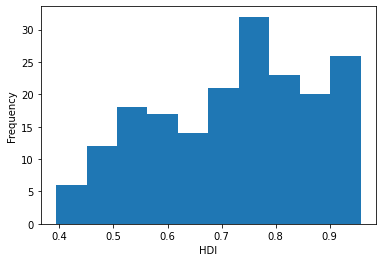

In [67]:
df['hdi_2019'].plot(kind = 'hist')
plt.xlabel('HDI')

Text(0.5, 0, 'Education')

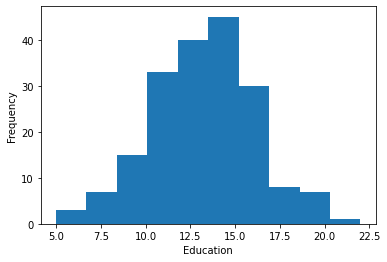

In [66]:
df['edu_2019'].plot(kind = 'hist')
plt.xlabel('Education')

### Visualize Relationships between Variables

In [65]:
# Creating a box plot to spot any outlier

df.corr()

,hdi_2019,hdi_var,edu_2019,edu_var,pov_index
hdi_2019,1.000000,-0.226686,0.903527,0.009894,-0.539800
hdi_var,-0.226686,1.000000,-0.113466,0.604425,0.161552
edu_2019,0.903527,-0.113466,1.000000,0.186468,-0.450020
edu_var,0.009894,0.604425,0.186468,1.000000,0.164098
pov_index,-0.539800,0.161552,-0.450020,0.164098,1.000000


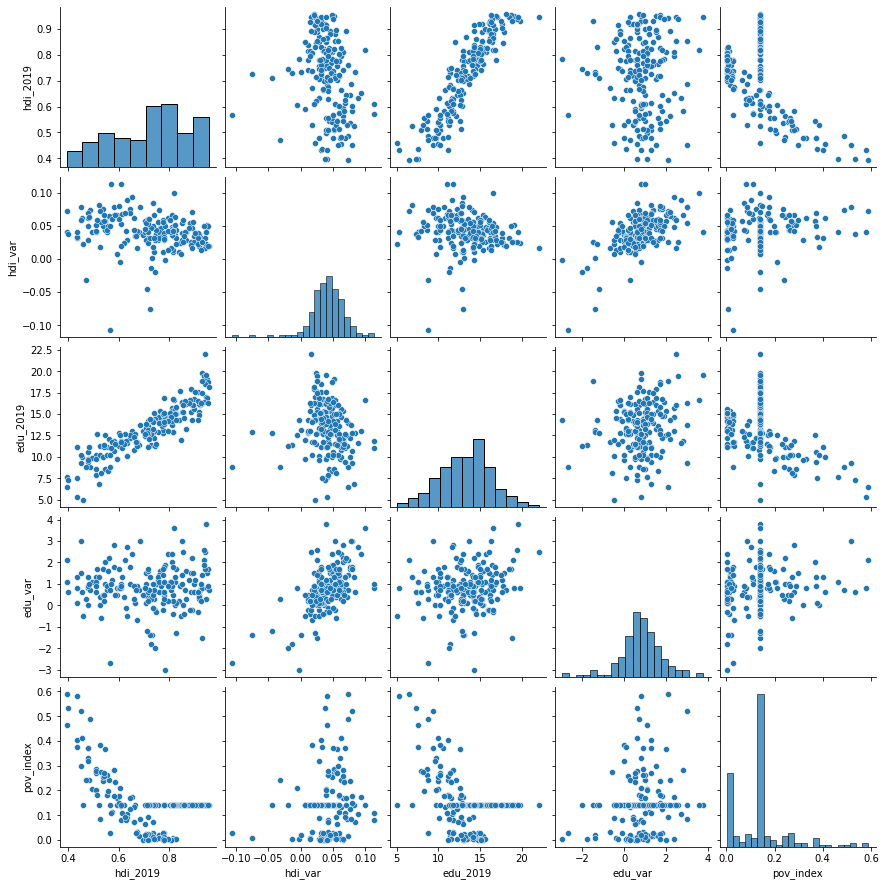

In [64]:
sns.pairplot(df)

<AxesSubplot:>

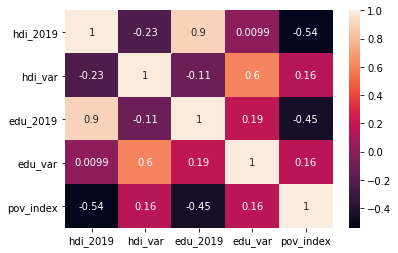

In [63]:
# Create a correlation heatmap for looking at the correlation of all variables.
figsize = (40,20)
sns.heatmap(df.corr(), annot = True)

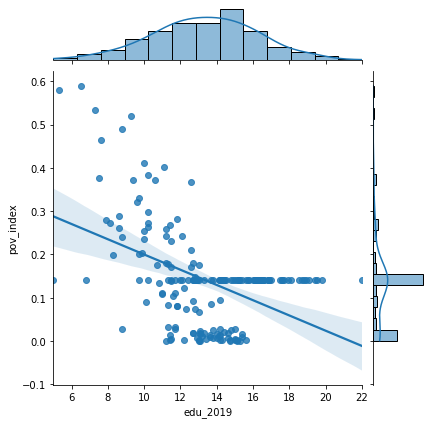

In [12]:
sns.jointplot(x= 'edu_2019', y = 'pov_index', data= df, kind= 'reg');

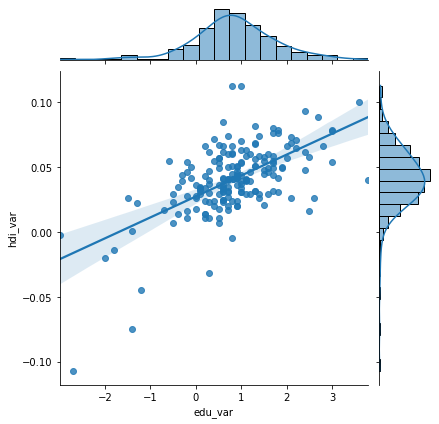

In [21]:
sns.jointplot(x= 'edu_var', y = 'hdi_var', data= df, kind= 'reg');

From the 2 plots above:
There is a negative correlation between poverty and education meaning that in case there is a confounder, improving education should result in decreased poverty. Strenght of the relationship between education and HDI (Shown on the 2nd graph above) shows that change in education over years directly positively impact HDI. 
So we can form as null hypothese H0: level of education improves poverty
Alternative hypothese H1: level of education does not improves poverty